# **Sensitivity of Bond Prices**

In [1]:
from datetime import datetime
from datetime import timedelta
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Price of a bond
def bond_price(fv, maturity, ytm, coupon, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments
  """
  ytm = ytm/100
  freq = float(freq)
  periods = maturity*freq
  coupon = (coupon/100)*fv/freq
  dt = [(i+1)/freq for i in range(int(periods))]
  price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + fv/(1+ytm/freq)**(freq*maturity)
  
  return round(price,2)


# Duration of a bond
def dura_bond (fv, coupon, ytm, maturity, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments
  """
  table = []
  for i in range(1, (maturity*freq + 1)):
    
    cf = (fv * coupon/100)/freq
    
    if i == maturity*freq:
      cf = cf + fv
    
    pv = cf / (1 + ((ytm/100)/freq))**i

    table.append([i, pv])

  columns = ['t', 'PV']
  df = pd.DataFrame(table, columns = columns)
  df['W'] = df['PV'] / df['PV'].sum()
  df['t*W'] = df['t'] * df['W']

  ds = df['t*W'].sum()

  return ds

### Consider a 30-year bond with 5% coupon rate and semiannual coupon payment. How is the price affected by a change in the YTM?

* Settlement Date: 2016-01-01
*  Maturity Date: 2046-01-01
*  Coupon Rate (%): 5
*  Frequency (per year): 2

    YTM%   Price
0    0.5  225.22
1    1.0  203.45
2    1.5  184.30
3    2.0  167.43
4    2.5  152.54
5    3.0  139.38
6    3.5  127.72
7    4.0  117.38
8    4.5  108.19
9    5.0  100.00
10   5.5   92.69
11   6.0   86.16
12   6.5   80.31
13   7.0   75.06
14   7.5   70.33
15   8.0   66.06
16   8.5   62.21
17   9.0   58.72
18   9.5   55.56
19  10.0   52.68


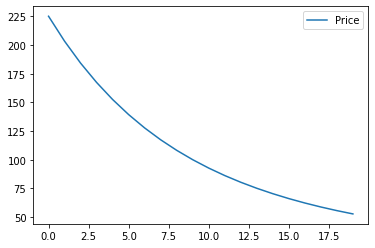

In [41]:
# bond_price(fv, maturity, ytm, coupon, freq=1)

ytm = 0.5
data = []
while ytm <= 10:
  data.append([ytm, bond_price(100, 30, ytm, 5, 2)])
  ytm += 0.5

columns = ['YTM%','Price']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Price'])
plt.show()

### What is the duration of a 5-year bond with a 5% coupon, semi-annually paid? The YTM is 3%.

In [30]:
# dura_bond (fv, coupon, ytm, maturity, freq)
ds = dura_bond (100, 5, 3, 5, 2)
dy = ds/freq

print(f'Duration (semesters): {round(ds, 2)}')
print(f'Duration (years): {round(dy, 2)}')

    t         PV         W       t*W
0   1   2.463054  0.022551  0.022551
1   2   2.426654  0.022218  0.044435
2   3   2.390792  0.021889  0.065668
3   4   2.355461  0.021566  0.086263
4   5   2.320651  0.021247  0.106235
5   6   2.286355  0.020933  0.125598
6   7   2.252567  0.020624  0.144366
7   8   2.219278  0.020319  0.162551
8   9   2.186481  0.020019  0.180168
9  10  88.320891  0.808635  8.086351
Duration (semesters): 9.02
Duration (years): 4.51


### Duration for alternative bonds if:

*  Coupon Rate = 1%
*  Coupon Rate = 0%
*  Maturity = 30 years
*  YTM = 1%

In [35]:
# dura_bond (fv, coupon, ytm, maturity, freq)
df =[]
print('Coupon Rate = 1%')
ds = dura_bond (100, 1, 3, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')


Coupon Rate = 1%
    t         PV         W       t*W
0   1   0.492611  0.005427  0.005427
1   2   0.485331  0.005346  0.010693
2   3   0.478158  0.005267  0.015802
3   4   0.471092  0.005190  0.020758
4   5   0.464130  0.005113  0.025564
5   6   0.457271  0.005037  0.030224
6   7   0.450513  0.004963  0.034740
7   8   0.443856  0.004889  0.039116
8   9   0.437296  0.004817  0.043355
9  10  86.597557  0.953951  9.539507
Duration (years): 4.88


In [36]:
print('Coupon Rate = 0%')
ds = dura_bond (100, 0, 3, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

Coupon Rate = 0%
    t         PV    W   t*W
0   1   0.000000  0.0   0.0
1   2   0.000000  0.0   0.0
2   3   0.000000  0.0   0.0
3   4   0.000000  0.0   0.0
4   5   0.000000  0.0   0.0
5   6   0.000000  0.0   0.0
6   7   0.000000  0.0   0.0
7   8   0.000000  0.0   0.0
8   9   0.000000  0.0   0.0
9  10  86.166723  1.0  10.0
Duration (years): 5.0


In [37]:
print('Maturity = 30 years')
ds = dura_bond (100, 5, 3, 30, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

Maturity = 30 years
     t         PV         W        t*W
0    1   2.463054  0.017671   0.017671
1    2   2.426654  0.017410   0.034821
2    3   2.390792  0.017153   0.051459
3    4   2.355461  0.016900   0.067598
4    5   2.320651  0.016650   0.083249
5    6   2.286355  0.016404   0.098422
6    7   2.252567  0.016161   0.113129
7    8   2.219278  0.015922   0.127380
8    9   2.186481  0.015687   0.141184
9   10   2.154168  0.015455   0.154553
10  11   2.122333  0.015227   0.167496
11  12   2.090969  0.015002   0.180023
12  13   2.060068  0.014780   0.192143
13  14   2.029623  0.014562   0.203865
14  15   1.999629  0.014347   0.215199
15  16   1.970078  0.014135   0.226153
16  17   1.940963  0.013926   0.236736
17  18   1.912279  0.013720   0.246958
18  19   1.884019  0.013517   0.256825
19  20   1.856176  0.013317   0.266347
20  21   1.828745  0.013121   0.275531
21  22   1.801719  0.012927   0.284386
22  23   1.775093  0.012736   0.292919
23  24   1.748860  0.012547   0.301138
24  2

In [38]:
print('YTM = 1%')
ds = dura_bond (100, 5, 1, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

YTM = 1%
    t         PV         W       t*W
0   1   2.487562  0.020823  0.020823
1   2   2.475186  0.020720  0.041439
2   3   2.462872  0.020617  0.061850
3   4   2.450619  0.020514  0.082056
4   5   2.438427  0.020412  0.102060
5   6   2.426295  0.020310  0.121862
6   7   2.414224  0.020209  0.141465
7   8   2.402213  0.020109  0.160870
8   9   2.390262  0.020009  0.180079
9  10  97.513164  0.816277  8.162773
Duration (years): 4.54


### What is the new price of this bond when the YTM increases by 100 bps?

In [40]:
price = bond_price(100, 5, 4, 5, 2)
print(f'New price: ${round(price, 2)}')

New price: $104.49


### Is the price of the bond with lower coupon rates more sensitive to YTM changes?

*  Maturity: 30 years
*  Frequency (per year): 2

Higher Coupon Rate: 5 %

Lower Coupon Rate: 0 %

    YTM%  Higher  Lower
0    0.5  225.22  86.09
1    1.0  203.45  74.14
2    1.5  184.30  63.87
3    2.0  167.43  55.04
4    2.5  152.54  47.46
5    3.0  139.38  40.93
6    3.5  127.72  35.31
7    4.0  117.38  30.48
8    4.5  108.19  26.31
9    5.0  100.00  22.73
10   5.5   92.69  19.64
11   6.0   86.16  16.97
12   6.5   80.31  14.68
13   7.0   75.06  12.69
14   7.5   70.33  10.98
15   8.0   66.06   9.51
16   8.5   62.21   8.23
17   9.0   58.72   7.13
18   9.5   55.56   6.18
19  10.0   52.68   5.35


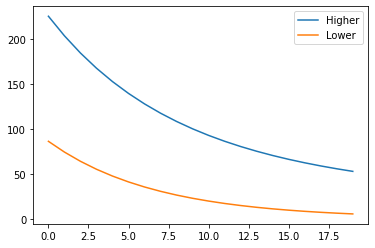

In [42]:
# bond_price(fv, ymaturity, ytm, coupon, freq=1)
coupon = [5, 0]
ytm = 0.5
data = []
while ytm <= 10:
  high = bond_price(100, 30, ytm, coupon[0], 2)
  low = bond_price(100, 30, ytm, coupon[1], 2)
  data.append([ytm, high, low])
  ytm += 0.5

columns = ['YTM%','Higher', 'Lower']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Higher', 'Lower'])
plt.show()

### Is the price of a long-term bond more sensitive to YTM changes?

*  Coupon Rate: 5 %
*  Frequency (per year): 2

Long-term maturity: 30 years

Short-term maturity: 3 years

    YTM%  Long-term  Short-term
0    0.5     225.22      113.38
1    1.0     203.45      111.79
2    1.5     184.30      110.23
3    2.0     167.43      108.69
4    2.5     152.54      107.18
5    3.0     139.38      105.70
6    3.5     127.72      104.24
7    4.0     117.38      102.80
8    4.5     108.19      101.39
9    5.0     100.00      100.00
10   5.5      92.69       98.63
11   6.0      86.16       97.29
12   6.5      80.31       95.97
13   7.0      75.06       94.67
14   7.5      70.33       93.39
15   8.0      66.06       92.14
16   8.5      62.21       90.90
17   9.0      58.72       89.68
18   9.5      55.56       88.49
19  10.0      52.68       87.31


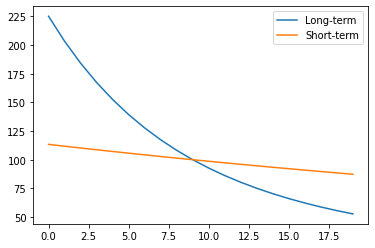

In [45]:
# bond_price(fv, ymaturity, ytm, coupon, freq=1)
maturity = [30, 3]
ytm = 0.5

data = []
while ytm <= 10:
  long = bond_price(100, maturity[0], ytm, 5, 2)
  short = bond_price(100, maturity[1], ytm, 5, 2)
  data.append([ytm, long, short])
  ytm += 0.5

columns = ['YTM%','Long-term', 'Short-term']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Long-term', 'Short-term'])
plt.show()

### Immunizing a hypothetical portfolio.